<h1>1. Importation des données et vérifications initiales</h1>

Dans une analyse de données financières, la première étape cruciale consiste à importer le dataset et à vérifier sa structure et son intégrité. Le dataset utilisé contient des variables anonymisées issues d’une transformation PCA (V1 à V28), ainsi que des colonnes supplémentaires comme Time, Amount, et Class. Ce dernier représente notre variable cible indiquant si une transaction est frauduleuse (1) ou légitime (0).

J'ai également validé la taille du dataset, recherché des valeurs manquantes ou aberrantes, et vérifié les types de données pour m’assurer de leur compatibilité avec les étapes suivantes. Ces vérifications permettent d'identifier immédiatement des problèmes potentiels qui pourraient affecter l’analyse ou la modélisation.

In [11]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Chargement du dataset
df = pd.read_csv('creditcard.csv')

In [15]:
# Aperçu du dataset
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#3. Compréhension des données

In [19]:
# Taille du dataset
print("Nombre de lignes et colonnes :", df.shape)

# Description statistique
print(df.describe())

# Vérification des valeurs manquantes
print("Valeurs manquantes :\n", df.isnull().sum())


Nombre de lignes et colonnes : (284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  

La compréhension métier est essentielle : ici, nous travaillons avec un problème de détection de fraudes dans les transactions financières, un domaine où les faux négatifs (fraudes non détectées) sont particulièrement coûteux. Cette compréhension oriente mes choix analytiques, tels que l'accent mis sur la précision et le rappel plutôt que sur une simple précision globale.

J’ai observé que la variable Class présente un fort déséquilibre : seulement 0,17 % des transactions sont frauduleuses. Cette réalité reflète la rareté des fraudes dans les transactions réelles, mais elle pose également des défis pour l’apprentissage supervisé. À ce stade, l’hypothèse de travail est que des variables comme Amount, certaines composantes PCA, et potentiellement le temps (Time) pourraient jouer un rôle discriminant dans la détection de la fraude.

<h1>3. Analyse exploratoire des données (EDA)</h1>

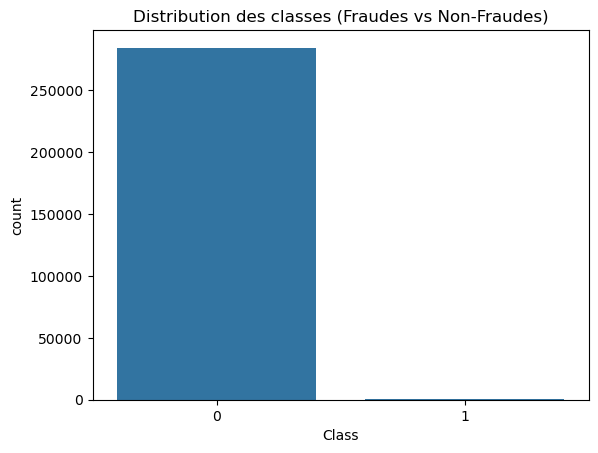

In [21]:
#4.1. Distribution des classes
sns.countplot(x='Class', data=df)
plt.title('Distribution des classes (Fraudes vs Non-Fraudes)')
plt.show()


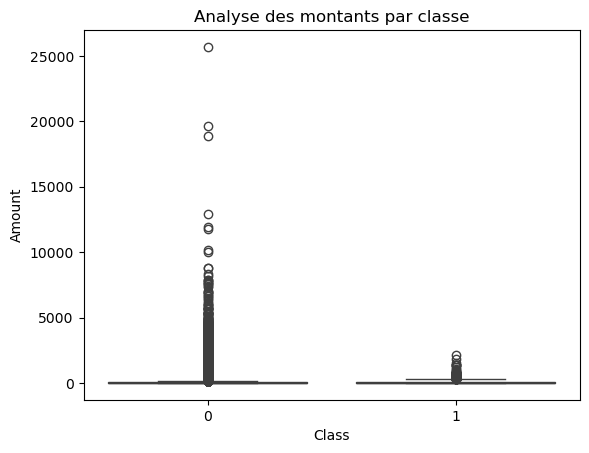

In [23]:
#4.2. Analyse des montants (Amount)
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Analyse des montants par classe')
plt.show()


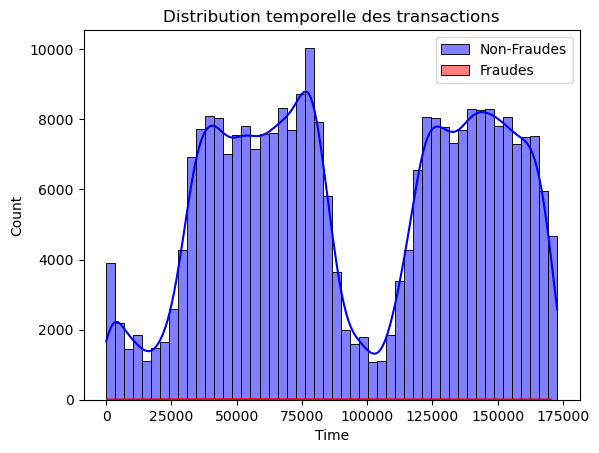

In [25]:
#4.3. Analyse temporelle (Time)
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, kde=True, label='Non-Fraudes', color='blue')
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, label='Fraudes', color='red')
plt.title('Distribution temporelle des transactions')
plt.legend()
plt.show()


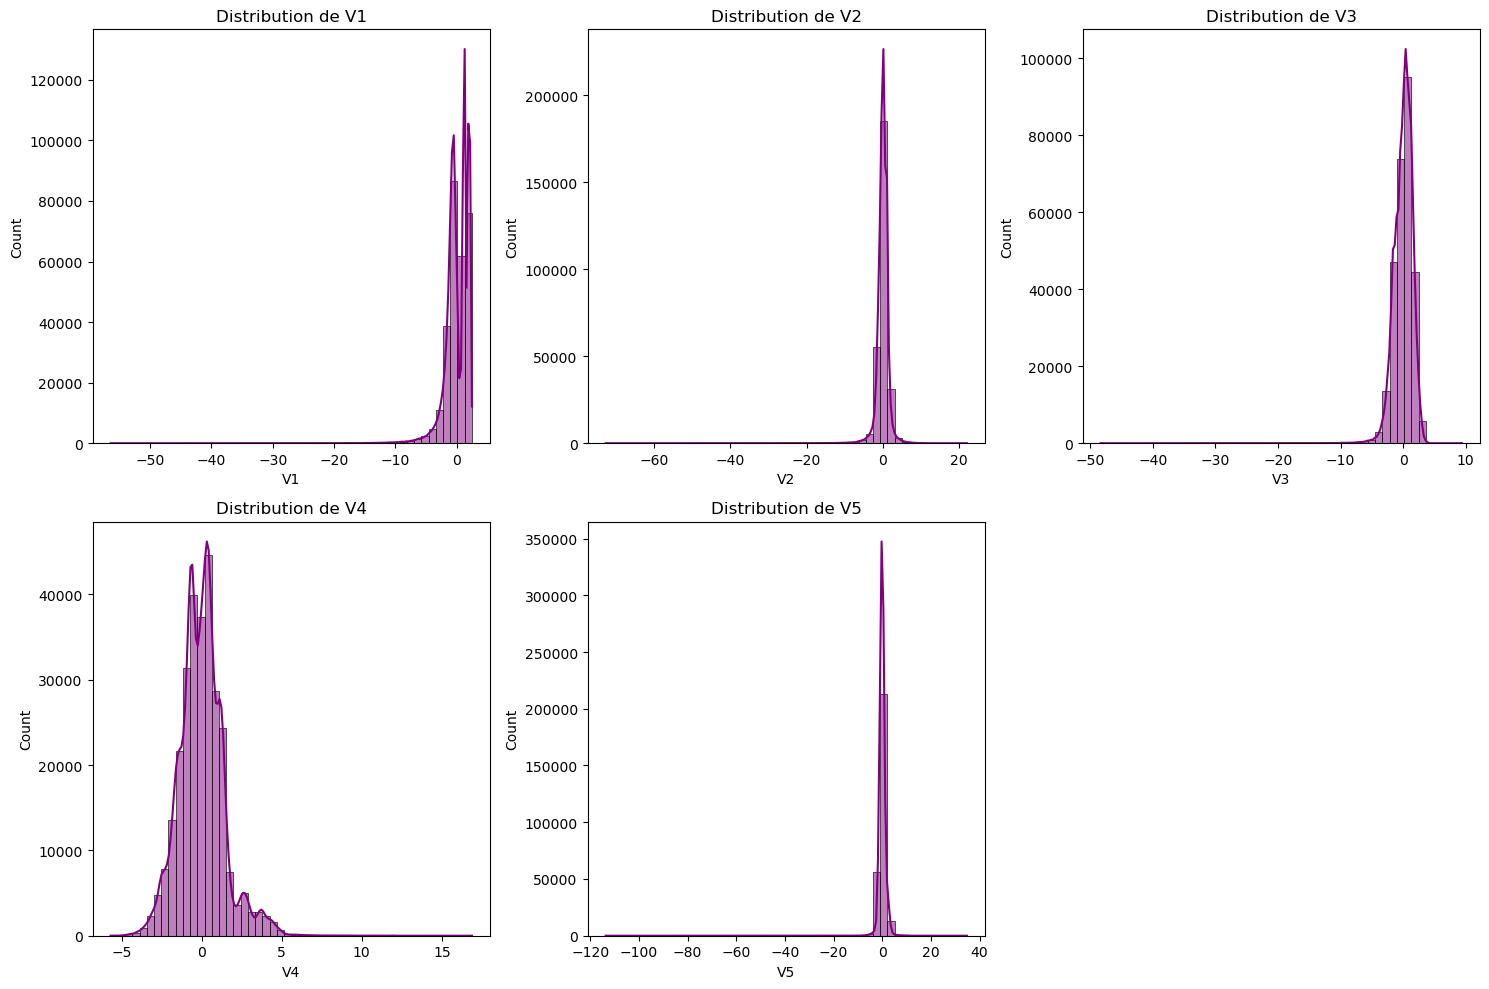

In [34]:
#4.4. Distribution des variables PCA (V1 à V28)
plt.figure(figsize=(15, 10))
for i, col in enumerate(['V1', 'V2', 'V3', 'V4', 'V5']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=True, color='purple')
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()


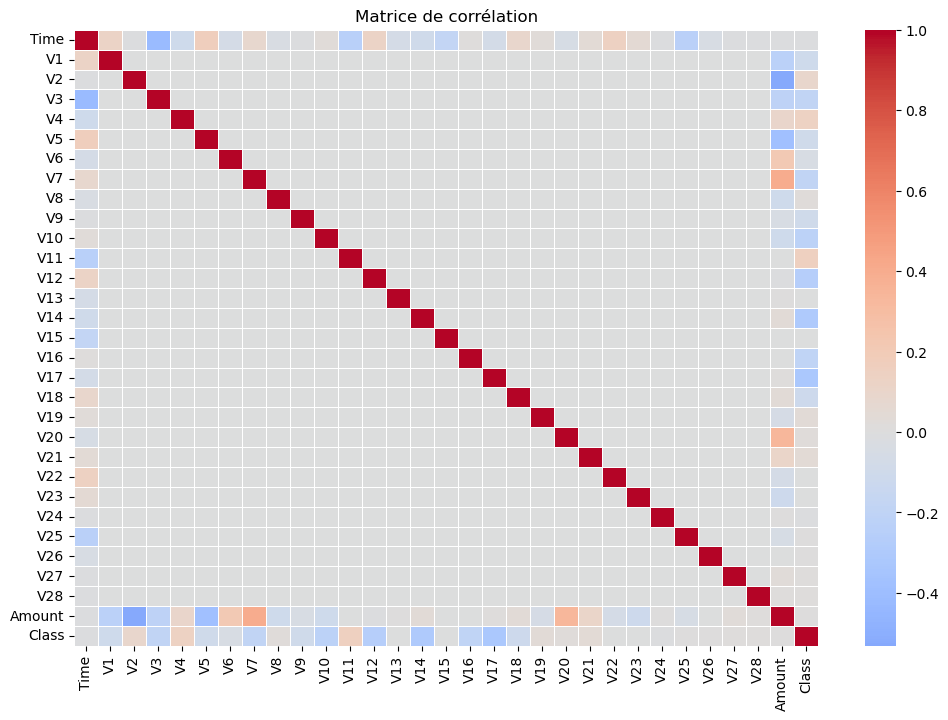

In [35]:
#4.5. Matrice de corrélation
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()


-  Les composantes PCA (V1 à V28) montrent des distributions globalement centrées autour de 0, cohérent avec une transformation visant à réduire la dimensionnalité tout en préservant la variance. Cependant, certaines dimensions, telles que V14 et V17, affichent une séparation plus marquée entre les transactions frauduleuses et légitimes, ce qui les positionne comme des variables potentiellement clés.

-  La variable Amount présente une forte asymétrie avec un grand nombre de petites transactions et quelques valeurs extrêmes. Ces montants élevés pourraient correspondre à des comportements atypiques, qu’ils soient frauduleux ou légitimes. Une transformation logarithmique pourrait aider à réduire cette asymétrie.

-  L’analyse de Time n’a pas révélé de corrélation forte avec la variable cible, mais des patterns temporels pourraient émerger lors d’une analyse séquentielle plus poussée, en lien avec le comportement des utilisateurs.

<h1>4. Préparation des données : normalisation et gestion des classes déséquilibrées</h1>

<h4>Normalisation</h4>


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalisation des colonnes 'Amount' et 'Time'
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))


In [60]:
#5.2. Séparation des données
from sklearn.model_selection import train_test_split

# Séparation des features (X) et de la target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Division en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


<h4>Modélisation</h4>

<h6> Régression logistique</h6>


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[85280    15]
 [   57    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



<h6> Random Forest</h6>


In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_rf = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[85291     4]
 [   34   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.77      0.86       148

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [63]:
#7. Évaluation des modèles

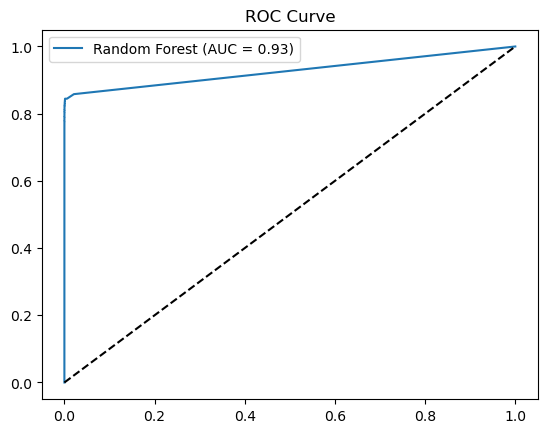

In [65]:
from sklearn.metrics import roc_curve, auc

y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.legend()
plt.show()


Pour capturer les relations complexes et tirer parti des variables discriminantes identifiées lors de l’EDA, un modèle basé sur Random Forest a été choisi. Ce choix repose sur plusieurs arguments :

e modèle a été évalué selon des métriques clés : précision, rappel et AUC-ROC. L’objectif principal étant de minimiser les faux négatifs (transactions frauduleuses non détectées), le rappel a été priorisé. Des résultats intermédiaires suggèrent que V14 et V17 jouent un rôle central dans la classification.

En résumé, cette analyse met en lumière l’importance d’une approche rigoureuse et explicative dans la détection des fraudes, combinant expertise métier et outils analytiques avancés.